In [ ]:
#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
x, y = mnist["data"], mnist["target"] #Creating arrays for the feature vectors and the labels
xtrain, xtest, ytrain, ytest = x[:60000], x[60000:], y[:60000], y[60000:]

In [29]:
#Importing the Random Forest Classifier and training it on the training set
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(xtrain, ytrain)

1313


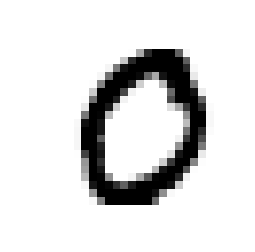

0.0

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

#Selecting a random image from the data set
images = xtrain.shape[0]
index = random.randrange(images)
print(index)

#Reshaping the array to a 28x28 pixel image
display = xtrain[index].reshape((28,28))

#Plotting the image
plt.imshow(display, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
ytrain[index]

In [34]:
#Predicting the digit in the image using the Random Forest Classifier
forest.predict([xtrain[index]])

array([ 0.])

In [35]:
#Predicting the probabilities for each class
forest.predict_proba([xtrain[index]])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
#Predicting all of the test cases
ypred = forest.predict(xtest)

#Computing the confusion matrix using sklearn.metrics
import sklearn.metrics as met

confusion = met.confusion_matrix(ytest, ypred)
print(confusion)

[[ 968    0    0    1    0    2    2    1    4    2]
 [   0 1123    4    3    1    0    3    0    1    0]
 [  14    2  979    4    4    0    3   12   13    1]
 [   1    0   18  953    0   16    2    9   10    1]
 [   2    5    2    1  933    3    9    1    3   23]
 [  11    1    3   29    6  819    6    2   11    4]
 [  17    3    5    0    7    8  915    0    2    1]
 [   4    9   17    5    9    1    0  966    6   11]
 [   7    0   11   22    7   17    5    6  886   13]
 [  11    4    2   14   23    4    1    7   10  933]]


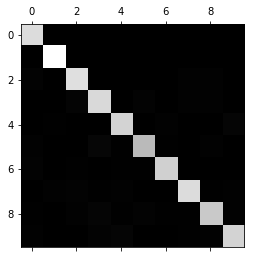

In [39]:
#Plotting the confusion matrix
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

In [40]:
#Normalizing the confusion matrix
rowtotals = confusion.sum(axis = 1)
norm_confusion = confusion.astype(float)

for n in range(len(confusion)):
    norm_confusion[n] = norm_confusion[n]/rowtotals[n]
    
print(norm_confusion)

[[  9.87755102e-01   0.00000000e+00   0.00000000e+00   1.02040816e-03
    0.00000000e+00   2.04081633e-03   2.04081633e-03   1.02040816e-03
    4.08163265e-03   2.04081633e-03]
 [  0.00000000e+00   9.89427313e-01   3.52422907e-03   2.64317181e-03
    8.81057269e-04   0.00000000e+00   2.64317181e-03   0.00000000e+00
    8.81057269e-04   0.00000000e+00]
 [  1.35658915e-02   1.93798450e-03   9.48643411e-01   3.87596899e-03
    3.87596899e-03   0.00000000e+00   2.90697674e-03   1.16279070e-02
    1.25968992e-02   9.68992248e-04]
 [  9.90099010e-04   0.00000000e+00   1.78217822e-02   9.43564356e-01
    0.00000000e+00   1.58415842e-02   1.98019802e-03   8.91089109e-03
    9.90099010e-03   9.90099010e-04]
 [  2.03665988e-03   5.09164969e-03   2.03665988e-03   1.01832994e-03
    9.50101833e-01   3.05498982e-03   9.16496945e-03   1.01832994e-03
    3.05498982e-03   2.34215886e-02]
 [  1.23318386e-02   1.12107623e-03   3.36322870e-03   3.25112108e-02
    6.72645740e-03   9.18161435e-01   6.72645

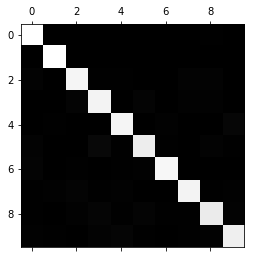

In [41]:
#Plotting the normalized confusion matrix
plt.matshow(norm_confusion, cmap=plt.cm.gray)
plt.show()

In [43]:
#Using sklearn.metrics to compute the accuracy score for the random forest
accuracy = met.accuracy_score(ytest, ypred, normalize = True, sample_weight = None)
print(accuracy)

0.9475
